## Business Problem : 
Jamboree is an eduactional institute which helps students to crack exams like GRE, GMAT and SAT.  We need to find out the factors which helps students to understand the factor which affect their admission in their choice of institute.
        



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.drop('Serial No.',axis = 1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Finding min and max values of the features
for i in df.columns:
  print(f"The min and max value of feature {i} is {df[i].min()} and {df[i].max()}.")

The min and max value of feature GRE Score is 290 and 340.
The min and max value of feature TOEFL Score is 92 and 120.
The min and max value of feature University Rating is 1 and 5.
The min and max value of feature SOP is 1.0 and 5.0.
The min and max value of feature LOR  is 1.0 and 5.0.
The min and max value of feature CGPA is 6.8 and 9.92.
The min and max value of feature Research is 0 and 1.
The min and max value of feature Chance of Admit  is 0.34 and 0.97.


In [ ]:
# Value count for various features
for i in df.columns:
  print(f"feature {i}")
  print(f"{df[i].value_counts(normalize=True)*100}")

feature GRE Score
312    4.8
324    4.6
316    3.6
321    3.4
322    3.4
327    3.4
311    3.2
320    3.2
314    3.2
317    3.0
325    3.0
315    2.6
308    2.6
323    2.6
326    2.4
319    2.4
313    2.4
304    2.4
300    2.4
318    2.4
305    2.2
301    2.2
310    2.2
307    2.0
329    2.0
299    2.0
298    2.0
331    1.8
340    1.8
328    1.8
309    1.8
334    1.6
332    1.6
330    1.6
306    1.4
302    1.4
297    1.2
296    1.0
295    1.0
336    1.0
303    1.0
338    0.8
335    0.8
333    0.8
339    0.6
337    0.4
290    0.4
294    0.4
293    0.2
Name: GRE Score, dtype: float64
feature TOEFL Score
110    8.8
105    7.4
104    5.8
107    5.6
106    5.6
112    5.6
103    5.0
100    4.8
102    4.8
99     4.6
101    4.0
111    4.0
108    3.8
113    3.8
109    3.8
114    3.6
116    3.2
115    2.2
118    2.0
98     2.0
119    2.0
120    1.8
117    1.6
97     1.4
96     1.2
95     0.6
93     0.4
94     0.4
92     0.2
Name: TOEFL Score, dtype: float64
feature University Rating
3    32.4
2 

### Insights

* There are 8 features having 7 dependent and 1 independent variable.
* Data is provided for 500 students.
* No missing values are present.
* No duplicate values are present.


In [ ]:
continuous_features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# Graphical Analysis

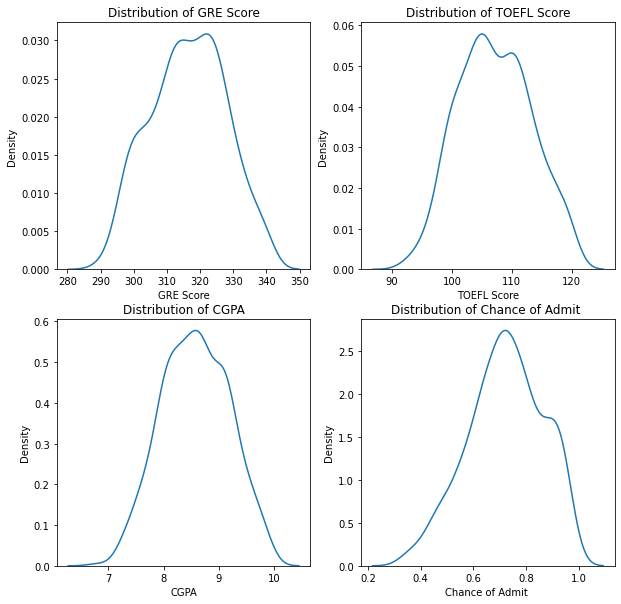

In [ ]:
#Various distribution
plt.figure(figsize = (10,10))
for i in range(len(continuous_features)):
    
    plt.subplot(2,2,i+1)
    sns.kdeplot(x = df[continuous_features[i]])
    plt.title(f"Distribution of {continuous_features[i]}")
plt.show()
    

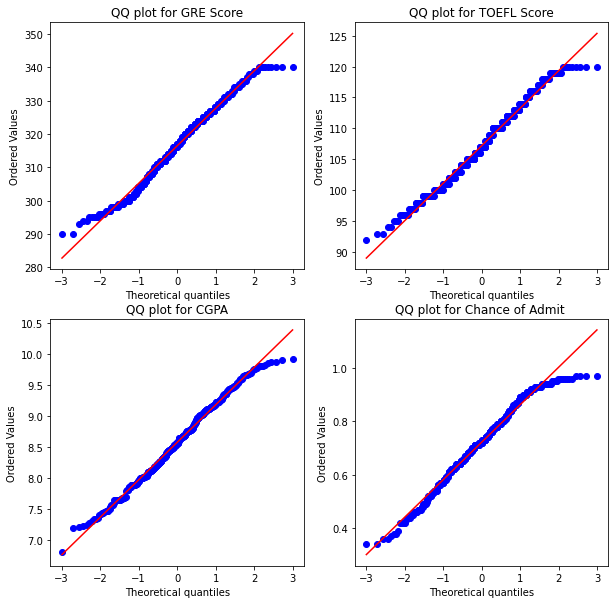

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(continuous_features)):
  plt.subplot(2,2,i+1)
  stats.probplot(df[continuous_features[i]],plot=plt)
  plt.title(f"QQ plot for {continuous_features[i]}")
plt.show()

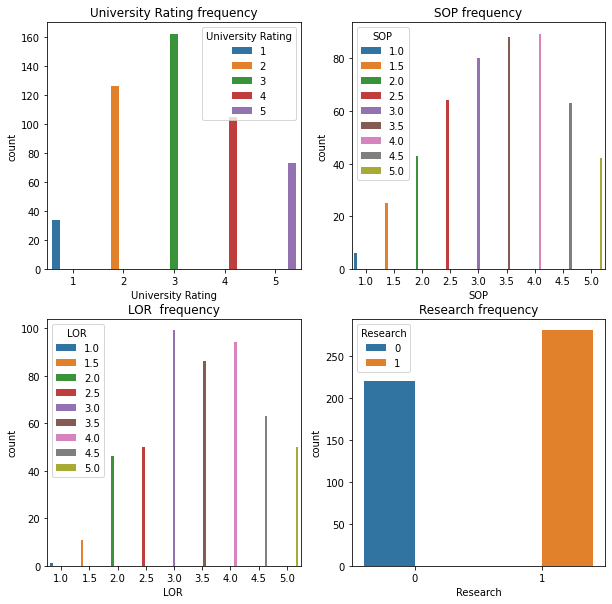

In [ ]:
ordinal_features = ['University Rating', 'SOP', 'LOR ','Research']
plt.figure(figsize=(10,10))
for index, feature in enumerate(ordinal_features):
    plt.subplot(2,2,index+1)
    sns.countplot(x = df[feature],hue=df[feature])
    plt.title(f"{feature} frequency")
plt.show()

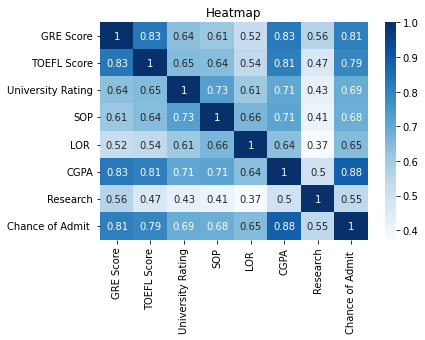

In [ ]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.title('Heatmap')
plt.show()

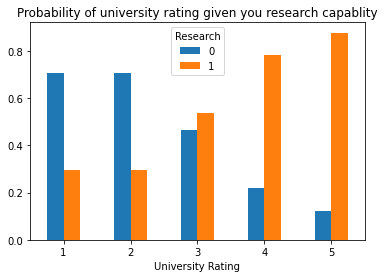

In [ ]:
 pd.crosstab(df['University Rating'], df['Research'],normalize='index').plot(kind='bar')
 plt.title('Probability of university rating given you research capablity')
 plt.xticks(rotation = 0)
 plt.show()

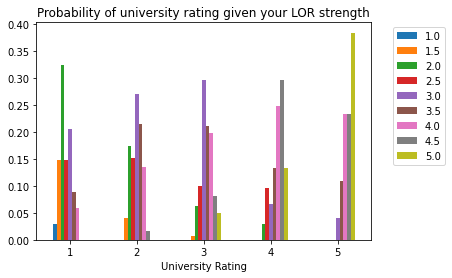

In [ ]:
 #
 pd.crosstab(df['University Rating'], df['LOR '],normalize='index').plot(kind='bar').legend(loc='best')
 plt.title('Probability of university rating given your LOR strength')
 plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
 plt.xticks(rotation = 0)
 plt.show()

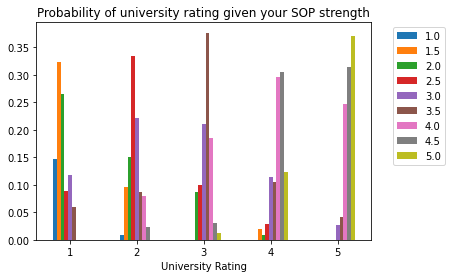

In [ ]:
 pd.crosstab(df['University Rating'], df['SOP'],normalize='index').plot(kind='bar').legend(loc='best')
 plt.title('Probability of university rating given your SOP strength')
 plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
 plt.xticks(rotation = 0)
 plt.show()

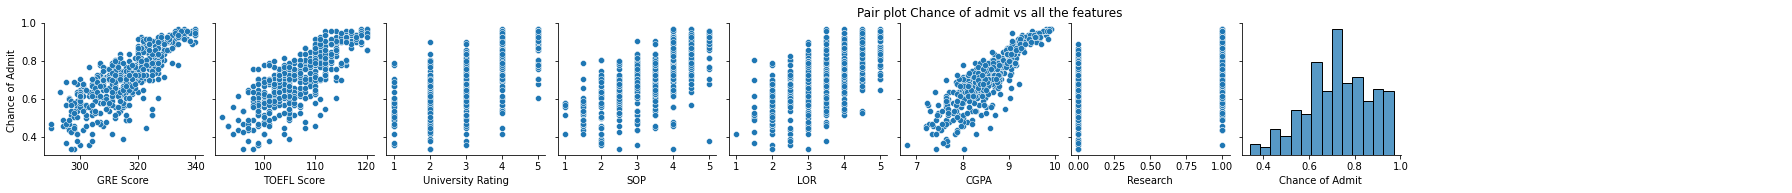

In [ ]:
sns.pairplot(df,y_vars = ['Chance of Admit '])
plt.title('Pair plot Chance of admit vs all the features                                                                                                                                                                           ')
plt.show()

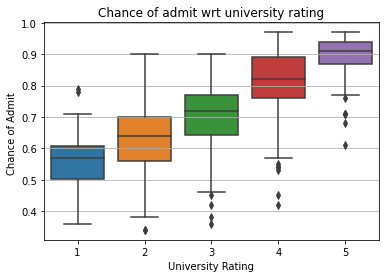

In [ ]:
sns.boxplot(x = 'University Rating', y = 'Chance of Admit ', data = df,)
plt.title('Chance of admit wrt university rating')
plt.grid(axis='y')
plt.show()

* Why some students who study in University which is rated 5 yet has lower chance of admit?

In [ ]:
df[(df['University Rating'] == 5) & (df['Chance of Admit '] < .90)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
26,322,109,5,4.5,3.5,8.80,0,0.76
35,320,110,5,5.0,5.0,9.20,1,0.88
45,322,110,5,5.0,4.0,9.10,1,0.88
46,329,114,5,4.0,5.0,9.30,1,0.86
47,339,119,5,4.5,4.0,9.70,0,0.89
109,304,103,5,5.0,4.0,8.64,0,0.68
110,305,108,5,3.0,3.0,8.48,0,0.61
119,327,104,5,3.0,3.5,8.84,1,0.71
131,303,105,5,5.0,4.5,8.65,0,0.77
132,309,105,5,3.5,3.5,8.56,0,0.71


* It might be because their SOP and LOR is not rated good enough meaning SOP and LOR plays a vital role.

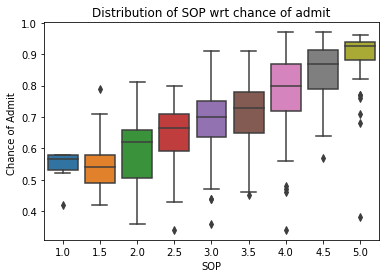

In [ ]:
sns.boxplot(x = 'SOP', y = 'Chance of Admit ', data = df)
plt.title('Distribution of SOP wrt chance of admit')
plt.show()

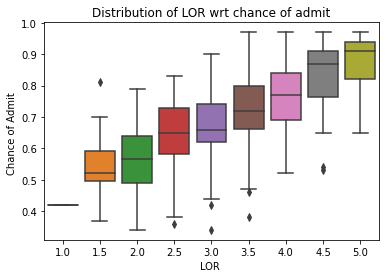

In [ ]:
sns.boxplot(x = 'LOR ', y = 'Chance of Admit ', data = df)
plt.title('Distribution of LOR wrt chance of admit')
plt.show()

* A very strange behaviour has been notices, why people have higher chance of admit with higher rank universities

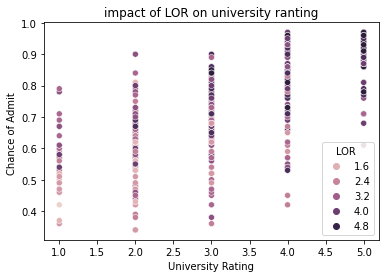

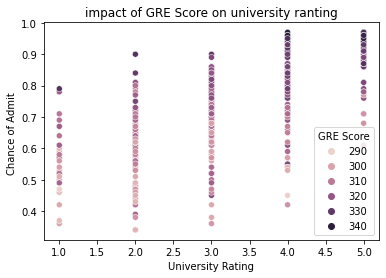

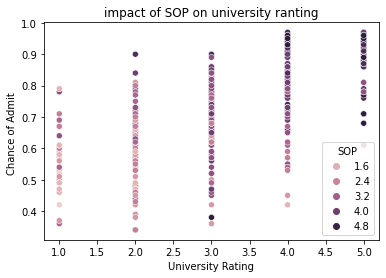

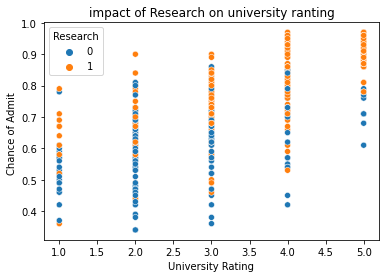

In [ ]:
sns.scatterplot(data=df, x = 'University Rating', y = 'Chance of Admit ', hue = 'LOR ')
plt.title('impact of LOR on university ranting')
plt.show()

sns.scatterplot(data=df, x = 'University Rating', y = 'Chance of Admit ', hue = 'GRE Score')
plt.title('impact of GRE Score on university ranting')
plt.show()

sns.scatterplot(data=df, x = 'University Rating', y = 'Chance of Admit ', hue = 'SOP')
plt.title('impact of SOP on university ranting')
plt.show()

sns.scatterplot(data=df, x = 'University Rating', y = 'Chance of Admit ', hue = 'Research')
plt.title('impact of Research on university ranting')
plt.show()

## Insights
* The distribution of continuous variables is approximately normally distributed.
* Most of the students are being admited to 3 Ranking universities.
* The correlation of all the featrues with Chance of admit is good, CGPA and GRE Score are the most significant among the rest.
* GRE Score, TOEFL and CGPA have approximately linear relation with chance of admit.
* The median chance of admit is highest for students who have university ranking 5.
* Having good letter of recommendation and statement of purpose also increase the chance of admit.
* Students in university rank 5 have all the high values for all the features,
meaning to enter university rank 5, a good GRE Score, SOP and LOR will always help.

## Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
x = df.drop('Chance of Admit ', axis=1).values
y = df['Chance of Admit '].values

x_columns = df.drop('Chance of Admit ', axis = 1).columns

In [ ]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [ ]:
#Standard Scaler Object --> scaler
scaler = StandardScaler()

#Calculating values
scaler.fit(x)

#Transforming independent variable to mean zero and standart deviation 1
X_scaled = scaler.transform(x)

In [ ]:
print(f"Mean of independent variables after transformation {X_scaled.mean(axis=0).round(3)}")
print(f"Std of independent variables after transformation {X_scaled.std(axis=0).round(3)}")

Mean of independent variables after transformation [ 0.  0.  0. -0.  0.  0. -0.]
Std of independent variables after transformation [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=1,test_size = 0.2)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#R2 score on train
linear_model.score(X_train, y_train)

0.8215099192361265

In [ ]:
# Model weights
model_coef = pd.DataFrame(data=linear_model.coef_.reshape(1,-1),columns = x_columns)
model_coef['intercept'] = linear_model.intercept_
model_coef['MSE'] = mean_squared_error(y_test, linear_model.predict(X_test))
model_coef['MAE'] = mean_absolute_error(y_test, linear_model.predict(X_test))
model_coef['R2_score'] = linear_model.score(X_test, y_test)

In [ ]:
model_coef

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept,MSE,MAE,R2_score
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881,0.003459,0.0402,0.820874


In [ ]:
(model_coef.sort_values(0,axis = 1) * 100 ).round(3)

,SOP,University Rating,Research,LOR,TOEFL Score,GRE Score,CGPA,intercept
0,0.298,0.7,0.987,1.334,1.928,2.067,7.051,72.288


### Assumptions of linear regression
* No multicollinearity
* The mean of residual is nearly zero.
* Linearity of Variables
* Test of homoscedasticity
* Normality of residual

In [ ]:
# VIF calculate
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))
vif = np.array(vif).reshape(1,-1)

vif_df = pd.DataFrame(data=vif, columns=x_columns)
vif_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,4.873265,4.243883,2.798252,2.920046,2.079334,4.751389,1.508148


In [ ]:
residual = y_train - linear_model.predict(X_train)
residual.shape


(400, 1)

In [ ]:
y_pred = linear_model.predict(X_train)
y_pred.shape

(400, 1)

In [ ]:
residual = y_train - y_pred

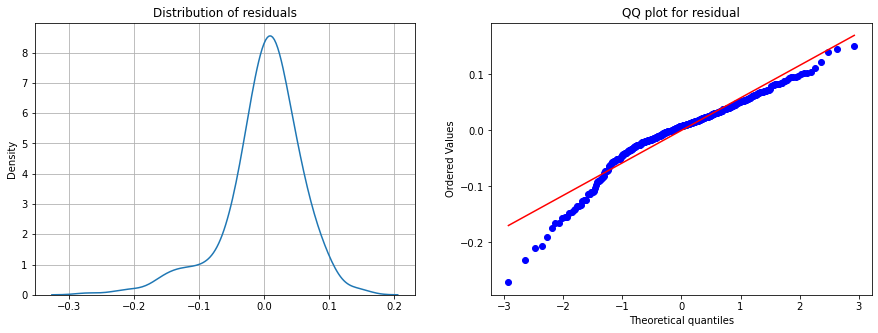

In [ ]:
# Normality of residuals


ax = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(residual.reshape(-1,))
plt.grid(True)
plt.title('Distribution of residuals')

# residual = residual.

plt.subplot(122)
stats.probplot(residual.reshape(-1,), plot = plt)
# scipy.stats.probplot(residual,fit=True,plot=plt)
plt.title('QQ plot for residual')
ax.show()

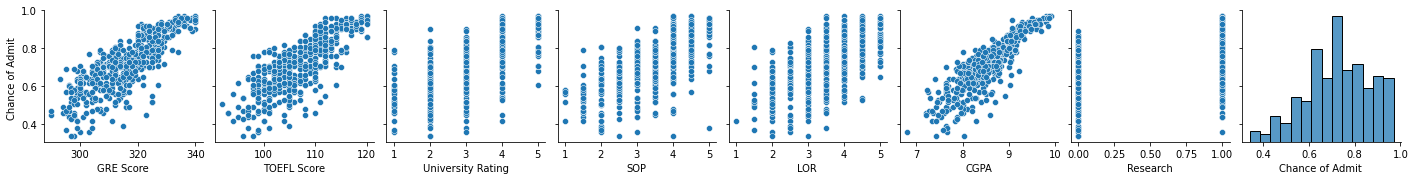

In [ ]:
#Linearity of varibales
sns.pairplot(df,y_vars = ['Chance of Admit '])
plt.show()

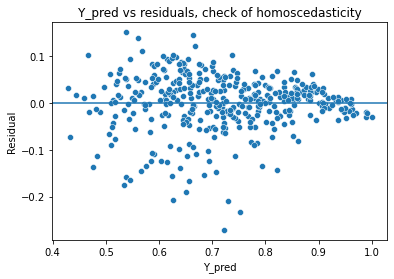

In [ ]:
# Test of homoscedasticity
sns.scatterplot(y_pred.reshape(-1,), residual.reshape(-1,))
plt.xlabel('Y_pred')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title("Y_pred vs residuals, check of homoscedasticity")
plt.show()

In [ ]:
y_pred = linear_model.predict(X_train)
y_pred.shape

(400, 1)

In [ ]:
#Function for adj R2 Score
def adj_r2(data,pred,col):
  adj_r2_list =list()
  n = len(data)
  for i in range(data.shape[1]):
    linear_model = LinearRegression()
    linear_model.fit(data[:,:i+1], pred)
    r2 = linear_model.score(data[:,:i+1], pred)
    
    p = i+1
    adj_r2_ans =1-(1-r2)*(n-1)/(n-p-1)
    adj_r2_list.append(adj_r2_ans.round(3))
  return pd.DataFrame(data = np.array(adj_r2_list).reshape(1,-1), columns = col)
  



In [ ]:
#Adjusted R2 Score
adj_r2(X_train, y_train,df.columns[:-1] )

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.665,0.711,0.739,0.75,0.762,0.815,0.818


In [ ]:
#Performance on train data
print(f'R2_Score : {linear_model.score(X_train,y_train).round(2)}')
print(f'Mean Squared Error : {mean_squared_error(y_train,y_pred).round(2)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_train,y_pred).round(2)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_train,y_pred)).round(2)}')

R2_Score : 0.82
Mean Squared Error : 0.0
Mean Absolute Error : 0.04
Root Mean Squared Error : 0.06


In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
#Performance on test data
print(f'R2_Score : {linear_model.score(X_test,y_test).round(2)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred).round(2)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred).round(2)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred)).round(2)}')

R2_Score : 0.82
Mean Squared Error : 0.0
Mean Absolute Error : 0.04
Root Mean Squared Error : 0.06


* The most useful features are CGPA followed by GRE Score, TOEFL Score, LOR.
* No multicolinearity was found in the data.
* Residuals approximately follows normal distribution.
* All the features were approximately linear with 'Target'.
* Homoscedasticity was found.
* Using Adjusted R2 score it was found that most of the features helps the model though some plays very small role like SOP, LOR thought combined they are significant.
* 

## Linear Regression using Lasso, Ridge and Elasticnet

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lr_lasso = Lasso(alpha = 0.01)
lr_lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [ ]:
lasso_weights = pd.DataFrame(data = lr_lasso.coef_.reshape(1,-1), columns = df.columns[:-1])
lasso_weights['Intercept'] = lr_lasso.intercept_

lasso_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020205,0.01716,0.004806,0.001322,0.009013,0.071295,0.00389,0.722704


In [ ]:
lasso_weights = pd.DataFrame(data=lr_lasso.coef_.reshape(1,-1),columns = x_columns)
lasso_weights['intercept'] = lr_lasso.intercept_
lasso_weights['MSE'] = mean_squared_error(y_test, lr_lasso.predict(X_test))
lasso_weights['MAE'] = mean_absolute_error(y_test, lr_lasso.predict(X_test))
lasso_weights['R2_score'] = lr_lasso.score(X_test, y_test)

In [ ]:
lasso_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept,MSE,MAE,R2_score
0,0.020205,0.01716,0.004806,0.001322,0.009013,0.071295,0.00389,0.722704,0.003791,0.041454,0.803679


In [ ]:
y_pred = lr_lasso.predict(X_train)

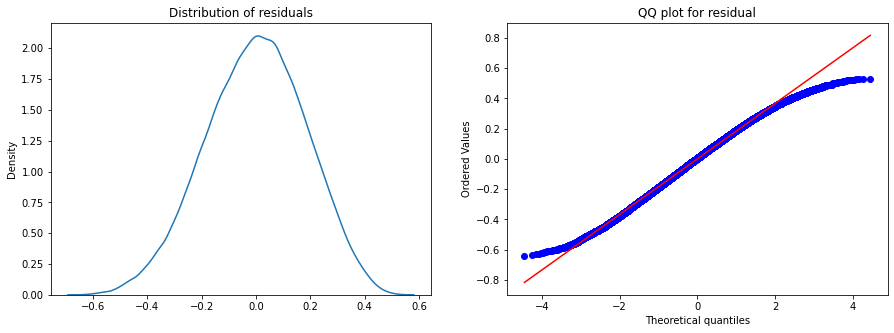

In [ ]:
# Distribution of residuals

residual = y_train - y_pred

ax = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(residual.reshape(-1,))
plt.title('Distribution of residuals')

# residual = residual.

plt.subplot(122)
stats.probplot(residual.reshape(-1,), plot = plt)
# scipy.stats.probplot(residual,fit=True,plot=plt)
plt.title('QQ plot for residual')
ax.show()

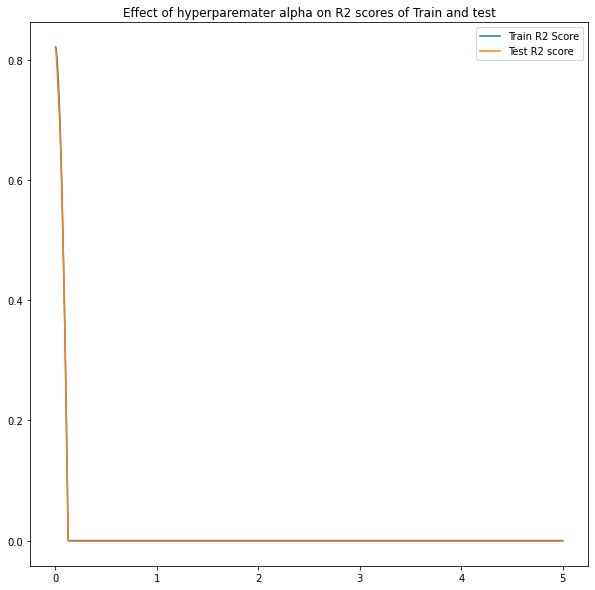

In [ ]:
#Hyperparameter Tuning

train_r2 = list()
test_r2 = list()
alpha = list()

i = 0
while i<=5:

  alpha.append(i)
  i = float(i)
  lr_lasso = Lasso(alpha = i)
  lr_lasso.fit(X_train,y_train)
  train_r2.append(lr_lasso.score(X_train, y_train))
  test_r2.append(lr_lasso.score(X_test, y_test))
  i+=0.001
plt.figure(figsize = (10,10))
sns.lineplot(alpha,train_r2,)
sns.lineplot(alpha, test_r2)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")


plt.show()

## Insights
* It is evident that Lasso causes sparsity.
* An optimal value of alpha is chosed by checking the r2 score wrt given value of alpha.
* The best values for alpha was found nearly at 0.01, which in turns leads to linear model without regularization.
* With the higher values alpha the residuals are not normally distributed and model is acting worse the r2 score was turns out be 0 leading a useless model.


## Ridge

In [ ]:
from sklearn.linear_model import Ridge  

In [ ]:
lr_ridge = Ridge()
lr_ridge.fit(X_train, y_train)

Ridge()

In [ ]:
ridge_weights = pd.DataFrame(data = lr_ridge.coef_.reshape(1,-1), columns = df.columns[:-1])
ridge_weights['Intercept'] = lr_ridge.intercept_

ridge_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020872,0.019405,0.007082,0.003122,0.013381,0.069874,0.00989,0.722884


In [ ]:
ridge_weights = pd.DataFrame(data=lr_ridge.coef_.reshape(1,-1),columns = x_columns)
ridge_weights['intercept'] = lr_ridge.intercept_
ridge_weights['MSE'] = mean_squared_error(y_test, lr_ridge.predict(X_test))
ridge_weights['MAE'] = mean_absolute_error(y_test, lr_ridge.predict(X_test))
ridge_weights['R2_score'] = lr_ridge.score(X_test, y_test)

In [ ]:
ridge_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept,MSE,MAE,R2_score
0,0.021576,0.019856,0.007392,0.003674,0.01354,0.067488,0.009959,0.722892,0.00347,0.040336,0.820289


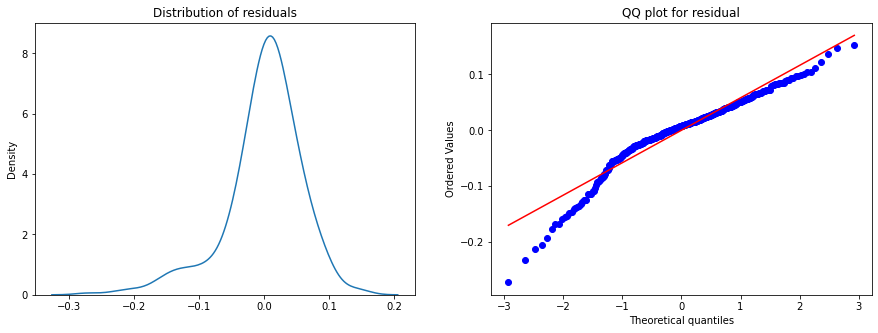

In [ ]:
# Distribution of residuals


residual = y_train - lr_ridge.predict(X_train)
residual = residual.reshape(-1,)

ax = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(residual.reshape(-1,))
plt.title('Distribution of residuals')

# residual = residual.

plt.subplot(122)
stats.probplot(residual.reshape(-1,), plot = plt)
# scipy.stats.probplot(residual,fit=True,plot=plt)
plt.title('QQ plot for residual')
ax.show()


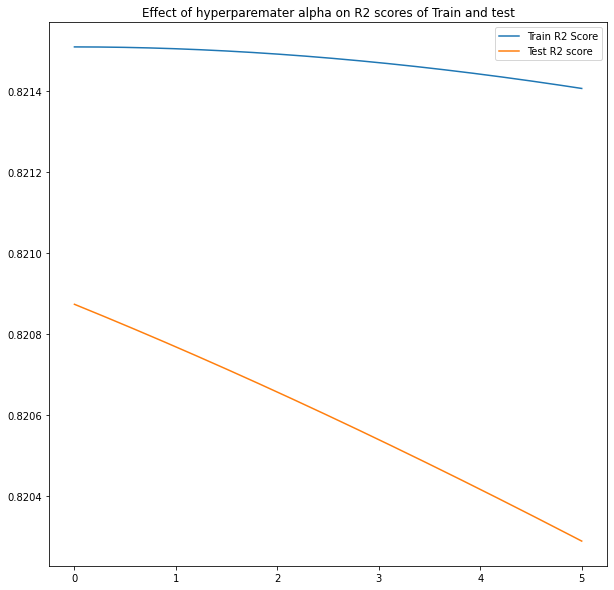

In [ ]:
#Hyperparameter Tuning


train_r2 = list()
test_r2 = list()
alpha = list()

i = 0
while i<=5:

  alpha.append(i)
  i = float(i)
  lr_ridge = Ridge(alpha = i)
  lr_ridge.fit(X_train,y_train)
  train_r2.append(lr_ridge.score(X_train, y_train))
  test_r2.append(lr_ridge.score(X_test, y_test))
  i+=0.001
plt.figure(figsize = (10,10))
sns.lineplot(alpha,train_r2,)
sns.lineplot(alpha, test_r2)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")

plt.show()

## Insights
* Ridge regression worked better than lasso.
* The alpha values still need to be kept very low.
* The coefficients turns out to be lower than the model without regularization.
* The residuals were normally distributed.


### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
#ElasticNet with alpha = 1

elastic = ElasticNet()
elastic.fit(X_train, y_train)

elastic_net_weights = pd.DataFrame(data = elastic.coef_.reshape(1,-1), columns = df.columns[:-1])
elastic_net_weights['Intercept'] = elastic.intercept_

elastic_net_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.720925


In [ ]:
elastic_net_weights = pd.DataFrame(data=elastic.coef_.reshape(1,-1),columns = x_columns)
elastic_net_weights['intercept'] = elastic.intercept_
elastic_net_weights['MSE'] = mean_squared_error(y_test, elastic.predict(X_test))
elastic_net_weights['MAE'] = mean_absolute_error(y_test, elastic.predict(X_test))
elastic_net_weights['R2_score'] = elastic.score(X_test, y_test)

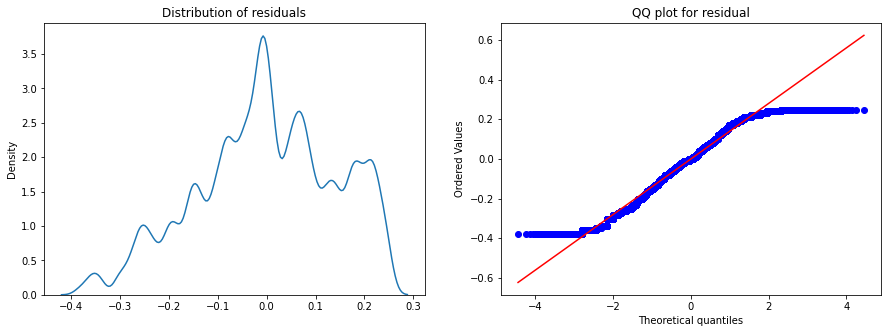

In [ ]:
# Distribution of residuals


residual = y_train - elastic.predict(X_train)
residual = residual.reshape(-1,)

ax = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.kdeplot(residual.reshape(-1,))
plt.title('Distribution of residuals')

# residual = residual.

plt.subplot(122)
stats.probplot(residual.reshape(-1,), plot = plt)
# scipy.stats.probplot(residual,fit=True,plot=plt)
plt.title('QQ plot for residual')
ax.show()

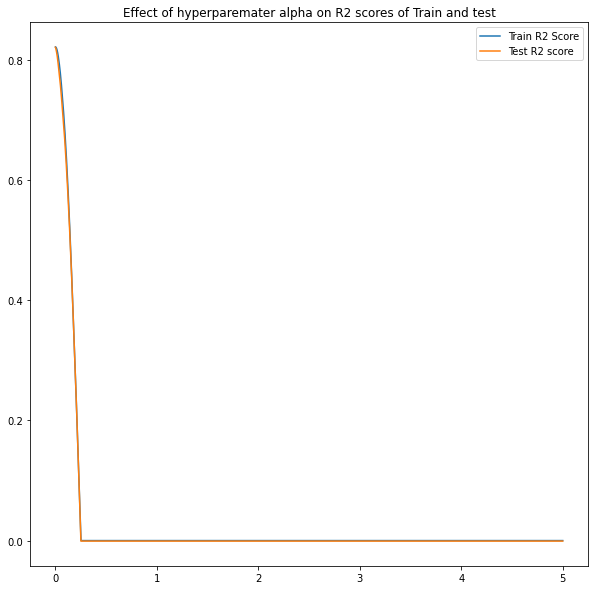

In [ ]:
#Hyperparameter Tuning


train_r2 = list()
test_r2 = list()
alpha = list()

i = 0
while i<=5:

  alpha.append(i)
  i = float(i)
  elastic = ElasticNet(alpha = i)
  elastic.fit(X_train,y_train)
  train_r2.append(elastic.score(X_train, y_train))
  test_r2.append(elastic.score(X_test, y_test))
  i+=0.001
plt.figure(figsize = (10,10))
sns.lineplot(alpha,train_r2,)
sns.lineplot(alpha, test_r2)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")

plt.show()

## Insights
* Elastic net worked the same way as lasso did for this perticular data.
* For good performance on train as well as test data the alpha value need to be kept low.


## Interpretation of the model
* CGPA of a student plays the most important role with the chance of admit.
* Some other import featres are GRE Score, TOEFL Score.
* Weights associated with the CGPA is 0.07, which means after standardizing the data, with the unit increase of CGPA will increase chance of admit by 7%.
* Similarly, a unit increase of the other features has the following impact: 
  * GRE Score --> 2.06%
  * TOEFL Score --> 1.9%
  * LOR --> 1.3%
  * University Rating --> 2.06%
  * Having reaserch capability --> 0.9%
  * SOP --> 0.29%
* There are other things that need to keep in mind while interpreting the model, when it is said that an increase in unit x feature will result in y% of the target, it is also important to understand the range of features, for example, a unit increase in CGPA means 10% (approx) increase in your total percentage during graduation or post-graduation and hence the range of increase is also important.

## Additional source for model improvement 
* IQ might play an important role in chance of admit in higher rank universities.
* We can improve the model by not just predicting for chance of admit but the university rank they potentially can have with the current state of attributes.


## Actionable insignts and Recommendations
* The education institute can not just help student to improve their GRE Score but can also assist them writing good LOR and SOP thus helping them admit to a better University.
* Awareness of CGPA and Reserach Capabilities : Seminars can be organised to increase the awareness regarding CGPA and Research Capablities to enhance the chance of admit.
* Any student can never change their current state of attributes so awareness and marketing campaign need to surveyed hence creating a first impression on student at undergraduate level, which wont just increase company's popularity but will also help sudent get prepared for future plans in advance. 
* A dashboard can be created for students whenever they loged in into your website, hence allowing a healthy competition also to create a progress report for students.
* Additional features like number of hours they put in studing, watching lectures, assignments soved percentage, marks in mock test can result a better report for every student to judge themselves and improve on their own.


In [ ]:
all_weights = pd.concat([model_coef, elastic_net_weights,lasso_weights,ridge_weights])
all_weights.index = ['Linear Model without regression','ElasticNet','Lasso','Ridge']
all_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept,MSE,MAE,R2_score
Linear Model without regression,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881,0.003459,0.040200,0.820874
ElasticNet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.720925,0.019328,0.113107,-0.000860
Lasso,0.020205,0.017160,0.004806,0.001322,0.009013,0.071295,0.003890,0.722704,0.003791,0.041454,0.803679
Ridge,0.021576,0.019856,0.007392,0.003674,0.013540,0.067488,0.009959,0.722892,0.003470,0.040336,0.820289
